#Segundo Parcial

Estadística Aplicada

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 41

In [77]:
#Importar librerias básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 10.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d436a5708673cfe1c0941b7d2f9c99f7bafbf8f883b33047e9525158883b1da1
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [79]:
#Importar librerias especializadas
from lifelines import CoxPHFitter
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import LogNormalAFTFitter

In [138]:
#Importar la base de datos
banco_ilusion = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
banco_ilusion

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


# 1. Análisis exploratorio

> a) ¿Cuántas variables y cuantas observaciones tiene la base?

In [81]:
banco_ilusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   saldo_cuenta             1000 non-null   object
 1   meses                    1000 non-null   int64 
 2   historia_crediticia      1000 non-null   object
 3   uso                      1000 non-null   object
 4   cantidad                 1000 non-null   int64 
 5   saldo_cuenta_ahorro      817 non-null    object
 6   años_trabajando          1000 non-null   object
 7   tasa_de_interes          1000 non-null   int64 
 8   genero_estado_civil      1000 non-null   object
 9   aval                     52 non-null     object
 10  años_actual_domicilio    1000 non-null   int64 
 11  activos                  1000 non-null   object
 12  edad                     1000 non-null   int64 
 13  planes_de_pago           186 non-null    object
 14  casa                     1000 non-null   

Hay 21 variables y cada una cuenta con 1,000 observaciones, excepto las variables saldo_cuenta_ahorro y aval que cuentan con 817 y 52 observaciones respectivamente.

> b) ¿Cuál es el monto promedio de los créditos otorgados por el banco?

In [82]:
monto_prom = banco_ilusion['cantidad'].mean()
print("El monto promedio de los créditos es de", monto_prom)

El monto promedio de los créditos es de 3271.258


> c) ¿Cuáles  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad?

In [83]:
tiempo_prom = banco_ilusion[banco_ilusion['credito_pagado']==1]['meses'].mean().round(3)
print("El tiempo promedio que se tardan en pagar el préstamo en su totalidad es de", tiempo_prom, "meses")

El tiempo promedio que se tardan en pagar el préstamo en su totalidad es de 19.207 meses


> d) ¿Cuál es la tasa de interés promedio otorgada por el banco?

In [84]:
tasa_prom = banco_ilusion['tasa_de_interes'].mean()
print("La tasa de interés promedio otrogada por el banco es de ", tasa_prom)

La tasa de interés promedio otrogada por el banco es de  2.973


> e) ¿Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron?

In [85]:
monto_prom_pag = banco_ilusion[banco_ilusion['credito_pagado'] == 1]['cantidad'].mean().round(3)
print("El monto promedio de los que ya pagaron es de", monto_prom_pag, "euros")

El monto promedio de los que ya pagaron es de 2985.457 euros


In [86]:
tasa_prom_pag = banco_ilusion[banco_ilusion['credito_pagado'] == 1]['tasa_de_interes'].mean()
print("La tasa de interés promedio de los que ya pagaron es de", tasa_prom_pag, "%")

La tasa de interés promedio de los que ya pagaron es de 2.92 %


> f) ¿Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado?

In [87]:
monto_prom_no_pag = banco_ilusion[banco_ilusion['credito_pagado'] == 0]['cantidad'].mean().round(3)
print("El monto promedio de los que no han pagaron es de ", monto_prom_no_pag, "euros")

El monto promedio de los que no han pagaron es de  3938.127 euros


In [88]:
tasa_prom_no_pag = banco_ilusion[banco_ilusion['credito_pagado'] == 0]['tasa_de_interes'].mean().round(3)
print("La tasa de interés promedio de los que no han pagaron es de", tasa_prom_no_pag, "%" )

La tasa de interés promedio de los que no han pagaron es de 3.097 %


# 2. Estime un modelo de Kaplan-meier

> a) ¿Cuál es la mediana del tiempo y que significa?

In [89]:
km1 = KaplanMeierFitter().fit(banco_ilusion['meses'], banco_ilusion['credito_pagado'])
km1.median_survival_time_

24.0

La mediana del tiempo es de 24 meses, esto significa que la mitad de las personas tardan más de 24 meses en pagar el préstamo o no lo han pagado, al igual significa que la mitad de las personas han terminado de pagar el préstamo en 24 meses.

> b) Es mayor/menor que el tiempo promedio del inciso 1c

En el inciso 1c el tiempo promedio es de 19.207 meses, por lo que se puede concluir que el tiempo promedio del inciso 2a es mayor ya que es de 24 meses.

# 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante,creciente, decreciente, o tipo log-normal respecto al tiempo

In [90]:
Exp = ExponentialFitter().fit(banco_ilusion['meses'], banco_ilusion['credito_pagado'])
Exp.AIC_

6157.194686589735

In [91]:
Weibull = WeibullFitter().fit(banco_ilusion['meses'],banco_ilusion['credito_pagado'])
Weibull.AIC_

5900.981425445045

In [92]:
Logn = LogNormalFitter().fit(banco_ilusion['meses'], banco_ilusion['credito_pagado'])
Logn.AIC_

5813.747334550531

Obtenidos los valores anteriores se concluye que la mejor opción es Log-Normal.

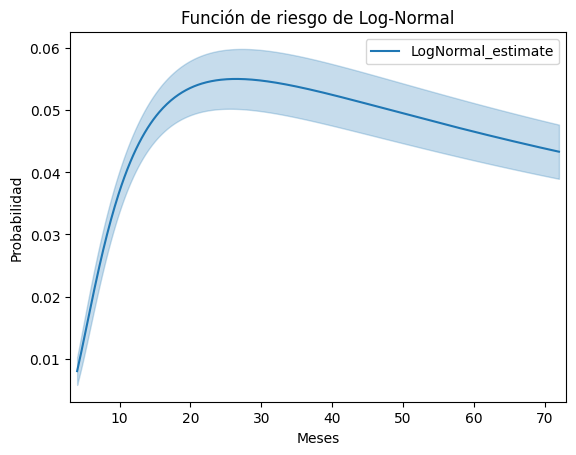

In [93]:
Logn.plot_hazard()
plt.xlim(3,73)
plt.title('Función de riesgo de Log-Normal')
plt.xlabel('Meses')
plt.ylabel('Probabilidad');

*El riesgo de que el préstamo se pague en su totalidad es tipo log-normal respecto al tiempo.*

# 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad

> a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

1. historia_crediticia
2. edad
3. numero_creditos
4. situacion_laboral

> b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo delevento y por qué

1. **historia_crediticia.** Aumenta el riesgo de que el préstamo se pague en su totalidad, ya que ha pagado otros créditos existe la posibilidad de que pague el crédito en su totalidad.

2. **edad.** Disminuye el riesgo de que el préstamo se pague en su totalidad, ya que entre más edad tenga puede morir y no pagar el crédito en su totalidad.

3. **numero_creditos.** Disminuye el riesgo de que el préstamo se pague en su totalidad, ya que si tiene varios créditos activos posiblemente no tendra la solvencia de pagar todos los créditos en su totalidad.

4. **situacion_laboral.** Aumenta el riesgo de que el préstamo se pague en su totalidad, ya que si trabaja tiene la solvencia de pagar el crédito en su totalidad.

5. **cantidad.** Disminuye el riesgo de que el préstamo se pague en su totalidad, ya que si la cantidad es fuerte no tendrá manera de pagar el crédito en su totalidad.

6. **tasa_de_interes.** Disminuye el riesgo de que el préstamo se pague en su totalidad, ya que si la la tasa de interés es muy alta la cantidad a pagar será mayor por lo que no podrá pagar el crédito en su totalidad.

> c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox

In [139]:
var = ['historia_crediticia','meses','cantidad','tasa_de_interes','edad','numero_creditos','situacion_laboral', 'credito_pagado']
banco_ilusion = banco_ilusion[var].copy()
banco_ilusion.isnull().sum()

historia_crediticia    0
meses                  0
cantidad               0
tasa_de_interes        0
edad                   0
numero_creditos        0
situacion_laboral      0
credito_pagado         0
dtype: int64

In [116]:
banco_ilusion.head(10)

,historia_crediticia,meses,cantidad,tasa_de_interes,edad,numero_creditos,situacion_laboral,credito_pagado
0,no_ha_pagado,6,1169,4,67,2,gobierno,1
1,pago_algun_credito,48,5951,2,22,1,gobierno,0
2,no_ha_pagado,12,2096,2,49,1,obrero,1
3,pago_algun_credito,42,7882,2,45,1,gobierno,1
4,pago_retrasado,24,4870,3,53,2,gobierno,0
5,pago_algun_credito,36,9055,2,35,1,obrero,1
6,pago_algun_credito,24,2835,3,53,1,gobierno,1
7,pago_algun_credito,36,6948,2,35,1,administrativo,1
8,pago_algun_credito,12,3059,2,61,1,obrero,1
9,no_ha_pagado,30,5234,4,28,2,administrativo,0


In [96]:
banco_ilusion.duplicated().sum()

0

In [97]:
banco_ilusion.dtypes

historia_crediticia    object
meses                   int64
cantidad                int64
tasa_de_interes         int64
edad                    int64
numero_creditos         int64
situacion_laboral      object
credito_pagado          int64
dtype: object

In [98]:
banco_ilusion['historia_crediticia'].value_counts()

pago_algun_credito    530
no_ha_pagado          293
pago_retrasado         88
pago_todos             49
sin_creditos           40
Name: historia_crediticia, dtype: int64

In [140]:
# Historial crediticio
# 0 = no_ha_pagado
# 1 = pago_algun_credito
# 2 = pago_retrasado
# 3 = pago_todos
# 4 = sin_creditos
conditions = [banco_ilusion['historia_crediticia'] == 'no_ha_pagado',
              banco_ilusion['historia_crediticia'] == 'pago_algun_credito',
              banco_ilusion['historia_crediticia'] == 'pago_retrasado',
              banco_ilusion['historia_crediticia'] == 'pago_todos',
              banco_ilusion['historia_crediticia'] == 'sin_creditos']
conditions_values = [0,1,2,3,4]
banco_ilusion['historia_crediticia'] = np.select(conditions,conditions_values,default='NA')
banco_ilusion['historia_crediticia'].value_counts()

1    530
0    293
2     88
3     49
4     40
Name: historia_crediticia, dtype: int64

In [141]:
#Crear dummies y no se pone la categoria 4 = sin_creditos
dummies_historial = pd.get_dummies(banco_ilusion['historia_crediticia'] ,prefix='pag')
dummies_historial = dummies_historial[['pag_0','pag_1','pag_2','pag_3']].astype('uint8')
dummies_historial

,pag_0,pag_1,pag_2,pag_3
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0
...,...,...,...,...
995,0,1,0,0
996,0,1,0,0
997,0,1,0,0
998,0,1,0,0


In [119]:
banco_ilusion['situacion_laboral'].value_counts()

gobierno          630
obrero            200
administrativo    148
desempleado        22
Name: situacion_laboral, dtype: int64

In [142]:
# Situacion_laboral
# 0 = gobierno
# 1 = obrero
# 2 = administrativo
# 3 = desempleado
conditions=[banco_ilusion['situacion_laboral'] == 'gobierno',
            banco_ilusion['situacion_laboral'] == 'obrero',
            banco_ilusion['situacion_laboral'] == 'administrativo',
            banco_ilusion['situacion_laboral'] == 'desempleado']
conditions_values=[0,1,2,3]
banco_ilusion['situacion_laboral']=np.select(conditions,conditions_values,default='NA')
banco_ilusion['situacion_laboral'].value_counts()

0    630
1    200
2    148
3     22
Name: situacion_laboral, dtype: int64

In [143]:
#Crear dummies y no se pone la categoria 1 = obrero
dummies_situacion = pd.get_dummies(banco_ilusion['situacion_laboral'],prefix='sit_lab')
dummies_situacion = dummies_situacion[['sit_lab_0','sit_lab_2','sit_lab_3']].astype('uint8')
dummies_situacion

,sit_lab_0,sit_lab_2,sit_lab_3
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,0,0,0
996,0,1,0
997,1,0,0
998,1,0,0


In [144]:
banco_ilusion = banco_ilusion.drop(['historia_crediticia','situacion_laboral'],axis=1)

In [145]:
banco_ilusion1 = pd.concat([dummies_historial, dummies_situacion], axis=1)

In [146]:
banco_ilusion.describe()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,credito_pagado
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,0.700000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.458487
min,4.000000,250.000000,1.000000,19.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,1.000000


In [147]:
banco_ilusion1.describe()

,pag_0,pag_1,pag_2,pag_3,sit_lab_0,sit_lab_2,sit_lab_3
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.293000,0.530000,0.088000,0.049000,0.630000,0.148000,0.022000
std,0.455366,0.499349,0.283437,0.215976,0.483046,0.355278,0.146757
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
banco_ilusion2 = pd.concat([banco_ilusion, banco_ilusion1], axis=1)
banco_ilusion2

,meses,cantidad,tasa_de_interes,edad,numero_creditos,credito_pagado,pag_0,pag_1,pag_2,pag_3,sit_lab_0,sit_lab_2,sit_lab_3
0,6,1169,4,67,2,1,1,0,0,0,1,0,0
1,48,5951,2,22,1,0,0,1,0,0,1,0,0
2,12,2096,2,49,1,1,1,0,0,0,0,0,0
3,42,7882,2,45,1,1,0,1,0,0,1,0,0
4,24,4870,3,53,2,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,1,1,0,1,0,0,0,0,0
996,30,3857,4,40,1,1,0,1,0,0,0,1,0
997,12,804,4,38,1,1,0,1,0,0,1,0,0
998,45,1845,4,23,1,0,0,1,0,0,1,0,0


d) Estima  un  modelo  de  cox  con  las  variables  elegidas  e  interpreta  los coeficientes.

In [149]:
CHP1 = CoxPHFitter()
CHP1.fit(banco_ilusion2, 'meses', 'credito_pagado')

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>

In [150]:
CHP1.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4028.69
         time fit was run = 2023-10-07 22:49:16 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
cantidad         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes  -0.45       0.64       0.04            -0.52            -0.37                 0.59                 0.69
edad              0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
numero_creditos   0.03       1.03       0.08            -0.13             0.19                 0.87                 1.21
pag_0             1.06       2.88       0.27             0.53             1.58                 1.71                 4.87
pag_1             0.68       1.97       0.27             0.15             1.21                 1.16                 3.35
pag_2             0.48       1.62       0.29            -0.08             1.05                 0.92                 2.87
pag_3             0.06       1.06       0.34            -0.61             0.74                 0.54                 2.09
sit_lab_0        -0.24       0.79       0.10            -0.43            -0.05                 0.65                 0.95
sit_lab_2         0.01       1.01       0.14            -0.25             0.28                 0.78                 1.32
sit_lab_3        -0.62       0.54       0.28            -1.17            -0.07                 0.31                 0.94

                  cmp to      z      p   -log2(p)
covariate                                        
cantidad            0.00 -16.03 <0.005     189.77
tasa_de_interes     0.00 -11.90 <0.005     106.03
edad                0.00   3.71 <0.005      12.26
numero_creditos     0.00   0.35   0.72       0.47
pag_0               0.00   3.95 <0.005      13.67
pag_1               0.00   2.52   0.01       6.40
pag_2               0.00   1.67   0.09       3.40
pag_3               0.00   0.18   0.85       0.23
sit_lab_0           0.00  -2.47   0.01       6.21
sit_lab_2           0.00   0.10   0.92       0.12
sit_lab_3           0.00  -2.20   0.03       5.16
---
Concordance = 0.79
Partial AIC = 8079.38
log-likelihood ratio test = 481.39 on 11 df
-log2(p) of ll-ratio test = 317.33

In [151]:
CHP1.params_

covariate
cantidad          -0.000391
tasa_de_interes   -0.448345
edad               0.012856
numero_creditos    0.029649
pag_0              1.059083
pag_1              0.680405
pag_2              0.484509
pag_3              0.062864
sit_lab_0         -0.241017
sit_lab_2          0.014032
sit_lab_3         -0.618408
Name: coef, dtype: float64

In [152]:
CHP1.hazard_ratios_

covariate
cantidad           0.999609
tasa_de_interes    0.638684
edad               1.012939
numero_creditos    1.030093
pag_0              2.883725
pag_1              1.974676
pag_2              1.623379
pag_3              1.064882
sit_lab_0          0.785828
sit_lab_2          1.014131
sit_lab_3          0.538802
Name: exp(coef), dtype: float64

De lo anterior tenemos la siguiente prueba de hipótesis con un valor de $\alpha = 0.05$

>$H_0 : \beta_{coef} = 0$

>$H_1 : \beta_{coef} \neq 0$

>$P_{value} < \alpha$

***Cantidad:***

>$P_{value} < 0.005$, entonces no es mayor a $\alpha$

>$1 - exp(coef) = 1 - 0.99 = 0.01$

Se rechaza $H_0$, por lo tanto entre mayor sea el préstamo, el riesgo disminuye 1% de pagar el préstamo en su totalidad.

---

***Tasa de interés:***

>$P_{value} < 0.005$, entonces no es mayor a $\alpha$

>$1 - exp(coef) = 1 - 0.64 = 0.36$

Se rechaza $H_0$, por lo tanto entre mayor sea la tasa de interés, el riesgo disminuye 36% de que pague el préstamo en su totalidad.

---

***Edad:***

>$P_{value} < 0.005$, entonces no es mayor a $\alpha$

>$exp(coef) - 1 = 1.01 - 1 = 0.01$

Se rechaza $H_0$, por lo tanto entre mayor edad tenga la persona, el riesgo aumenta 1% de que pague el préstamo en su totalidad.

---

***Número de créditos:***

>$P_{value} = 0.72$, entonces es mayor a $\alpha$

No se rechaza $H_0$, por lo tanto el número de créditos que tenga la persona no afecta a que pague el préstamo en su totalidad.

---

***No ha pagado (pag_0):***

>$P_{value} < 0.005$, entonces no es mayor a $\alpha$

>$exp(coef) - 1 = 2.88 - 1 = 1.88$

Se rechaza $H_0$, por lo tanto si no ha pagado el préstamos, el riesgo aumenta 188% de que pague el préstamo en su totalidad.

---

***Pago algún crédito (pag_1):***

>$P_{value} = 0.01$, entonces no es mayor a $\alpha$

>$exp(coef) - 1 = 1.97 - 1 = 0.97$

Se rechaza $H_0$, por lo tanto si pago algún crédito, el riesgo aumenta 97% de que pague el préstamo en su totalidad.

---

***Pago retrasado (pag_2):***

>$P_{value} = 0.09$, entonces es mayor a $\alpha$

No se rechaza $H_0$, por lo tanto los pagos restrasados que realice una persona no afecta a que pague el préstamo en su totalidad.

---

***Pago todo (pag_3):***

>$P_{value} = 0.85$, entonces es mayor a $\alpha$

No se rechaza $H_0$, por lo tanto los pagos que realice una persona no afecta a que pague el préstamo en su totalidad.

---

***Gobierno (sit_lab_0):***

>$P_{value} = 0.01$, entonces no es mayor a $\alpha$

>$1 - exp(coef) = 1 - 0.79 = 0.21$

Se rechaza $H_0$, por lo tanto si trabaja en el gobierno, el riesgo disminuye 21% de que pague el préstamo en su totalidad.

---

***Administrativo (sit_lab_2):***

>$P_{value} = 0.92$, entonces es mayor a $\alpha$

No se rechaza $H_0$, por lo tanto si trabaja en el administrativo no afecta a que pague el préstamo en su totalidad.

---

***Desempleado (sit_lab_3):***

>$P_{value} = 0.03$, entonces no es mayor a $\alpha$

>$1 - exp(coef) = 1 - 0.54 = 0.46$

Se rechaza $H_0$, por lo tanto si es desempleado, el riesgo disminuye 46% de que pague el préstamo en su totalidad.

# 5. Con  base  en  los  cálculos  realizados,  redacta  un  comentariointegralde  por  lo menos  250 palabras que  resuma  el  análisis,  reflexiones  y  recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión.

Analizando el monto promedio de los que no han pagaron es de  3938.127 euros por lo que una de las primeras recomendaciones es no dar préstamos mayores a 3939 euros ya que no pagarán, al igual que la tasa de interés promedio de los que no han pagaron es de 3.097%, por lo que la tasa de interés no debería de ser mayor a 3.1% para que logren pagar.

Otro punto importante es dar préstamos a las personas que trabajan en el gobierno ya que si pagan el préstamo en su totalidad, a las personas que trabajan en administrativo no se les debería de dar préstamo ya que no pagan.

De lo anterior, las personas que han pagado algún crédito se les puede autorizar un préstamo ya que si pagan en su totalidad, de igual manera los que no han pagado. Las personas que tienen más créditos no afecta a que paguen en su totalidad, entonces, no es punto importante para analizar al autorizar el préstamo.

Y por último, las personas que tienen mayor edad son personas que si pagan el préstamo en su totalidad, por lo que si se les debería de dar préstamos.

Para finalizar, el Banco de la Ilusión (BIL) debe de revisar en donde trabaja la persona, como realiza sus pagos, la edad que tiene y así ver si le autorizan el préstamo, y una vez autorizado el préstamo tener en cuenta la tasa de interés como la cantidad a prestar para que así la mayoria de las personas paguen el préstamo en su totalidad.

Recomentación. Analizar el monto que le pagan a la persona ya que teniendo esa información es mas fácil saber si tiene solvencia para pagar un préstamo en su totalidad y darle la cantidad que podría pagar.